In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
transaction_dataset = pd.read_csv('../dataset/transaction_online_payments.csv')
transaction_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Data Exploration

In [3]:
transaction_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
transaction_dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


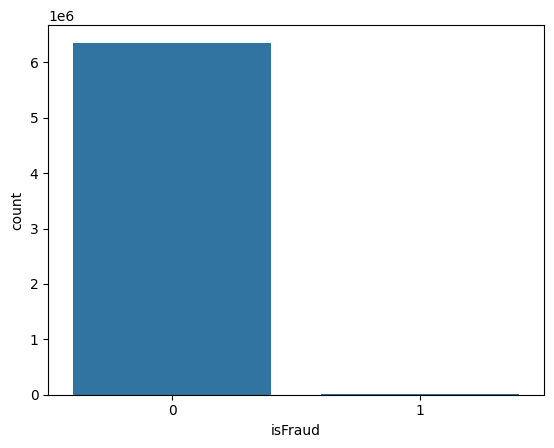

In [5]:
sns.countplot(x='isFraud', data=transaction_dataset)
plt.show()

**Catatan Insight!** <br>
Berdasarkan plot tersebut menunjukan ketidak seimbangan yang signifikan, jauh lebih banyak transaksi non-penipuan (0) dibandingkan transaksi penipuan (1).Ketidaksemibangan ini menjadi sebuah tantangan untuk memodelkan pendeteksian penipuan, yang memerlukan teknik untuk mengatasi data yang menyimpang.

In [6]:
transaction_dataset['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [7]:
transaction_dataset['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [8]:
per = (8123/6362604)*100
per

0.12766785423075205

**Catatan Insight!** <br>
Data ini menunjukan, bahwa dari 6.362.604 transaksi,  6.354.407 diantaranya **Non fraud** dan 8213 diantaranya terindikasi **Penipuan**.Hal ini menghasilkan presentase penipuan sekitar 0,13% yang menunjukan rendahnya insiden aktivtas penipuan yang terjadi dalam kumpulan data.

Perbedaan antara transaksi non-penipuan dan penipuan menjadi tantangan dalam mendeteksi penipuan karena jarangnya kasus-kasus tersebut, sehingga memerlukan analisis mendalam untuk mengidentifikasi anomali-anomali ini dalam sejumlah besar transaksi reguler.




In [9]:
### Lakukan Pengecekan terhadap rekening penerima transfer palsu yang digunakan oleh seseorang sebagai rekening penerima untuk pencairan
fraud = transaction_dataset[transaction_dataset['isFraud'] == 1]
valid = transaction_dataset[transaction_dataset['isFraud'] == 0]

In [10]:
fraud_transfer = fraud[fraud['type'] == 'TRANSFER']
fraud_cashout = fraud[fraud['type'] == 'CASHOUT']

fraud_transfer.nameDest.isin(fraud_cashout.nameOrig).any()

False

In [11]:
## Tambahkan fitur untuk type 1
data_new = transaction_dataset.copy()
data_new['Type2'] = np.nan  #Untuk melakukan inisialiasasi fitur kolom

## Pengisian nilai pada fitur kolom
data_new.loc[transaction_dataset.nameOrig.str.contains('C') & transaction_dataset.nameDest.str.contains('C'),"Type2"] = "CC"
data_new.loc[transaction_dataset.nameOrig.str.contains('C') & transaction_dataset.nameDest.str.contains('M'),"Type2"] = "CM"
data_new.loc[transaction_dataset.nameOrig.str.contains('M') & transaction_dataset.nameDest.str.contains('C'),"Type2"] = "MC"
data_new.loc[transaction_dataset.nameOrig.str.contains('M') & transaction_dataset.nameDest.str.contains('M'),"Type2"] = "MM"
data_new

C:\Users\restu\AppData\Local\Temp\ipykernel_7976\3724981959.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'CC' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_new.loc[transaction_dataset.nameOrig.str.contains('C') & transaction_dataset.nameDest.str.contains('C'),"Type2"] = "CC"


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Type2
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,CM
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,CM
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,CC
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,CC
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,CM
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,CC
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,CC
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,CC
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,CC


ValueError: Could not interpret value `oldbalanceOrig` for `y`. An entry with this name does not appear in `data`.

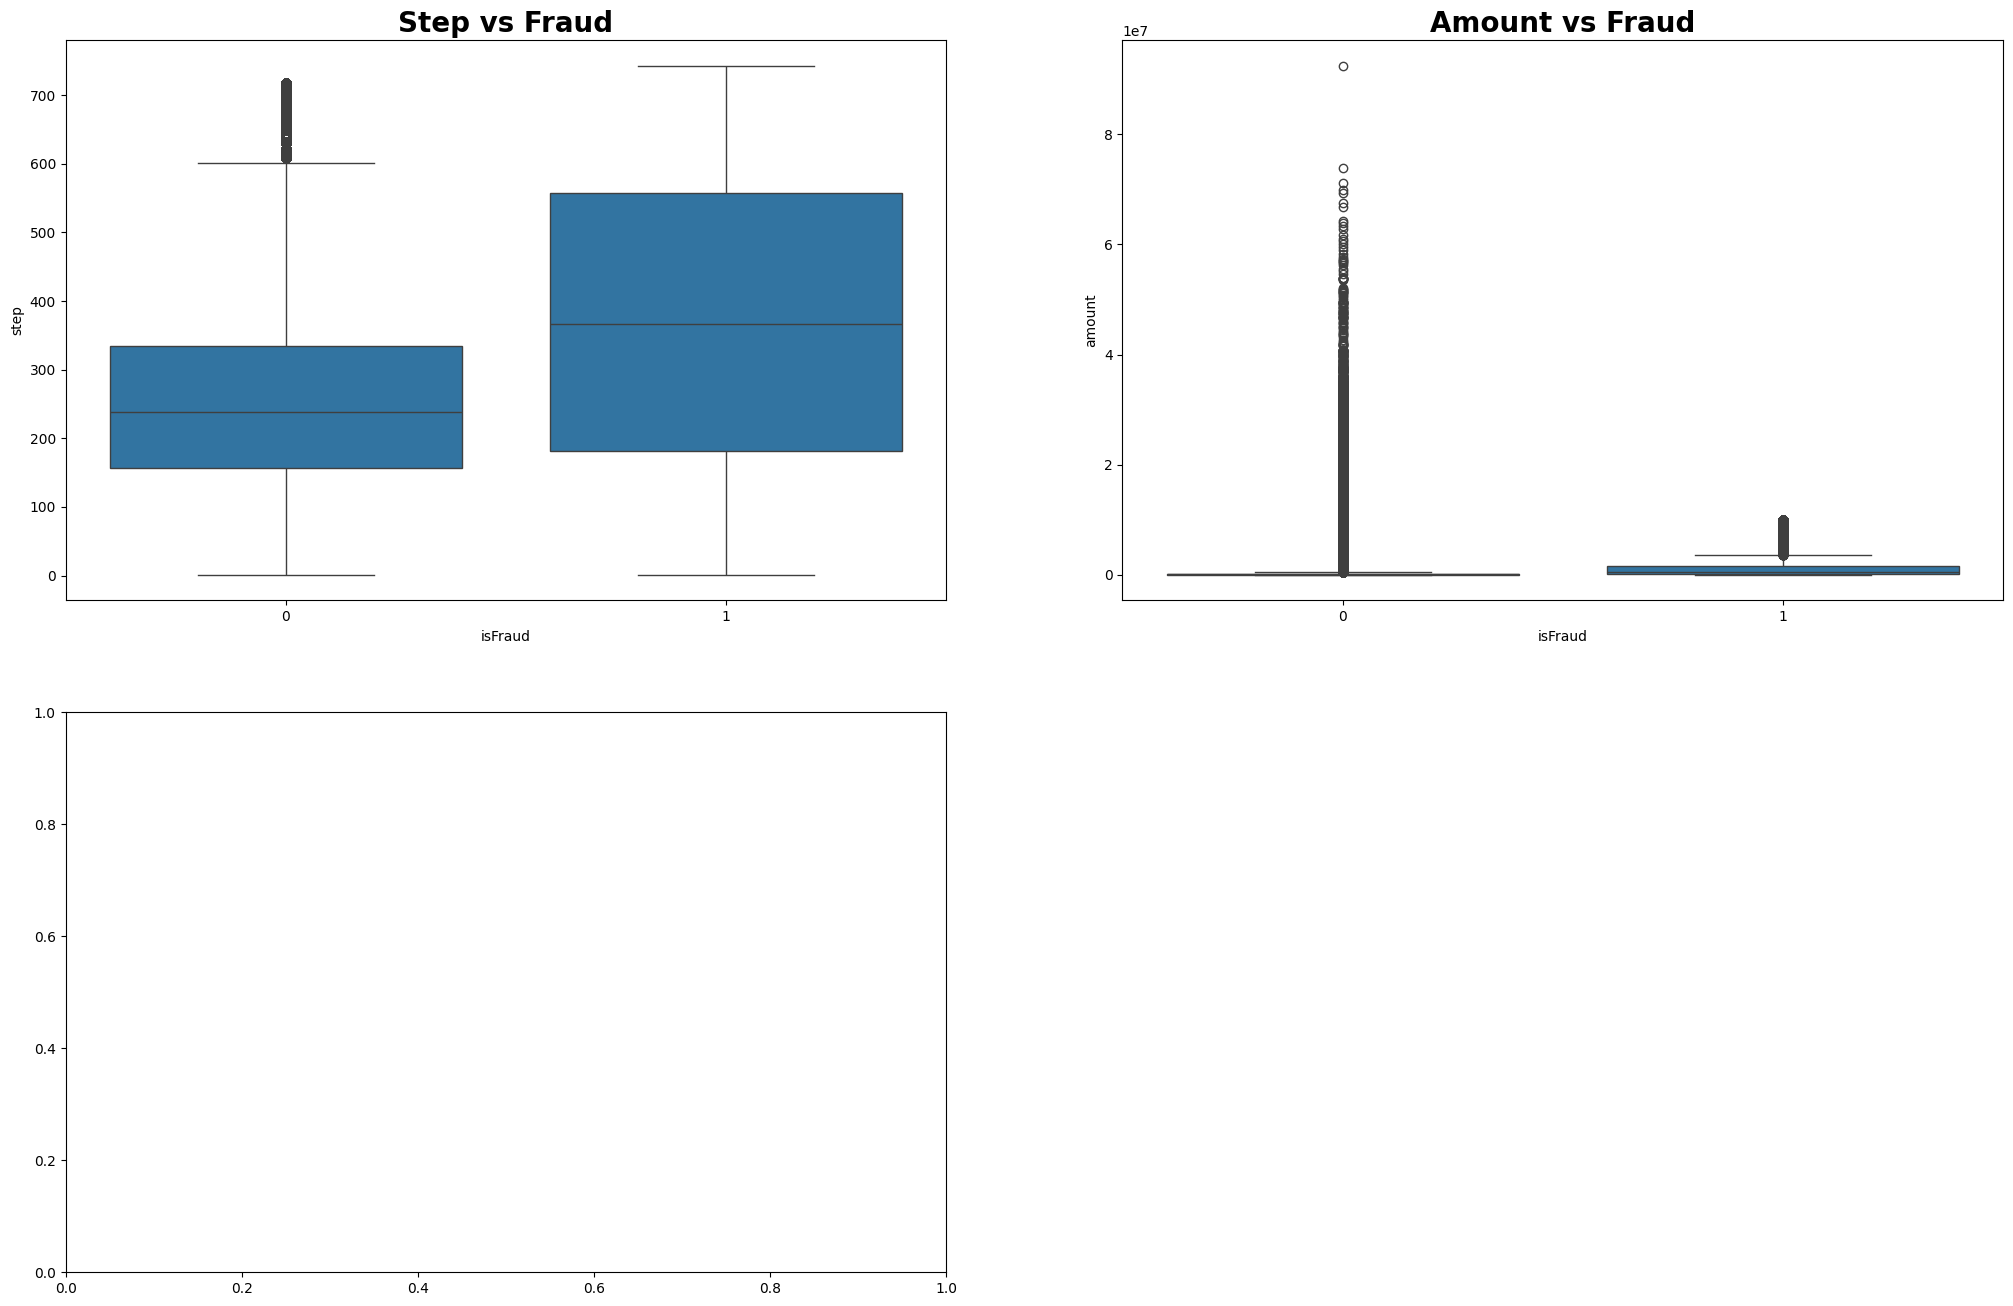

In [12]:
plt.figure(figsize=(25,16))

# Membuat Plot Step vs Fraud
plt.subplot(2, 2, 1)
sns.boxplot(x= 'isFraud', y= 'step', data= data_new)
plt.title('Step vs Fraud', fontweight='bold', size=20)

# Membuat plot Amount vs Fraud
plt.subplot(2, 2, 2)
sns.boxplot(x= 'isFraud', y= 'amount', data= data_new)
plt.title('Amount vs Fraud', fontweight='bold', size=20)

# Membuat Plot oldbalanceOrg vs Fraud
plt.subplot(2, 2, 3)
sns.boxplot(x= 'isFraud', y= 'oldbalanceOrig', data= data_new)
plt.title('Old Balance Origin vs Fraud', fontweight='bold', size=20)

# Membuat plot oldbalanceDest vs Fraud
plt.subplot(2, 2, 4)
sns.boxplot(x= 'isFraud', y= 'oldbalanceDest', data= data_new)
plt.title('Old Balance Destination vs Fraud', fontweight='bold', size=20)

**Catatan Insight!** <br>
Terdapat 4 Visualisasi Boxplot, yang dilakukan untuk memeriksa distribusi tiap fitur berbeda yang memiliki keterkaitan dengan penipuan

<li>Distribusi Gambar 1 yaitu Step vs Fraud, menunjukan bahwa penyebaran transaksi peniupuan yang lebih tinggi.
<li>Distribusi Gambar 2 yaitu Amount vs Fraud, diidentifikasikan terdapat outlier yang menonjol diantara transaksi non-penipuan.
<li>Distribusi 3 yaitu Old Balance Orign vs Penipuan, menunjukan banyaknya outlier yang tinggi dalam kasus penipuan
<li>Distribusi 4 yaitu Old Balance Destination vs Penipuan, menunjukan banyaknya variabilitas dan outlier yang teridentifikasi diantara transasksi yang non-penipuan


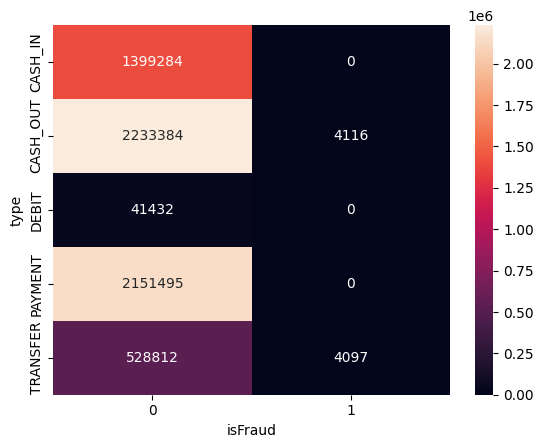

<Figure size 640x480 with 0 Axes>

In [ ]:
# Melakukan Kategori pendistribusian
plt.figure()
ct = pd.crosstab(transaction_dataset['type'], transaction_dataset['isFraud'])
sns.heatmap(ct, annot=True, fmt='d')
plt.figure('Jenis Transaksi vs Penipuan')
plt.show()

**Catatan Insight!** <br>
Berdasarkan hasil analisis pola, terindikafikasi bahwa pada jenis transaksi CASH OUT dan TRANSFER, menunjukan bahwa perusahaan harus memperioritaskan pemantauan ketegori tersebut karena beresiko tinggi.

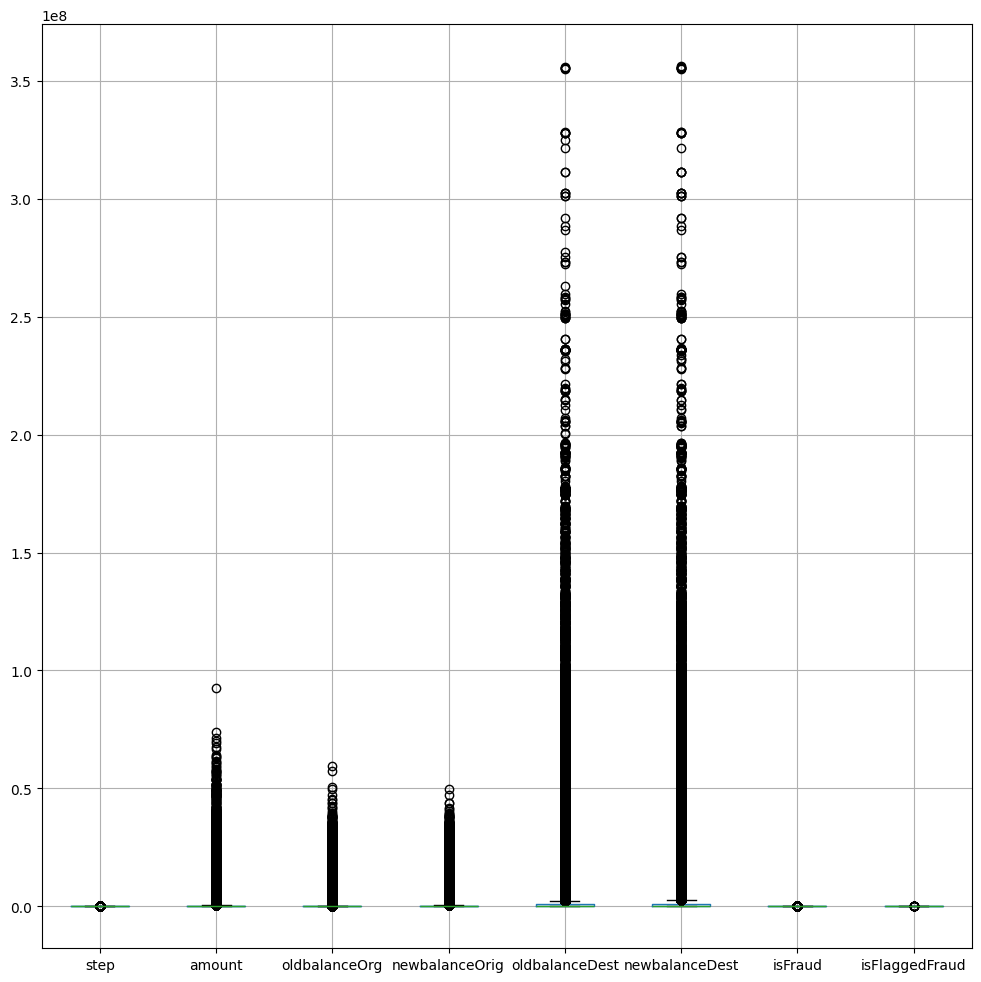

In [ ]:
# Lakukan identfikasi Outlier
transaction_dataset.boxplot(figsize=(12,12))
plt.show()

**Catatan Insight!** <br>
Berdasarkan analisis identifikasi Outlier, menunjukan bahwa Old Balance Destination memiliki penyebaran terbesar dan oulier yang signifikan pada saldo akhir akun tujuan.Sedangkan amount, old balance origin, dan new balance origin menunjukan penyebaran moderat dengan beberapa outlier, menunjukan kisaran jumlah transaksi dan nominal saldo akun sebelum dan sesudah melakukan transaksi.Pada fitur step, isFraud, dan isFlaggedFraud menunjukan sedikit atau bahkan tidak ada variasi, yang menunjukan bahwa fitur-fitur tersebut relatif konsisten diseluruh kumpulan data.Oulier dan Penyebaran yang ditemukan dapat memberikan informasi analisis lebih lanjut untuk memahami distribusi dan perilaku nasabah dalam bertransaksi, terutama dalam melakukan pendeteksian penipuan.

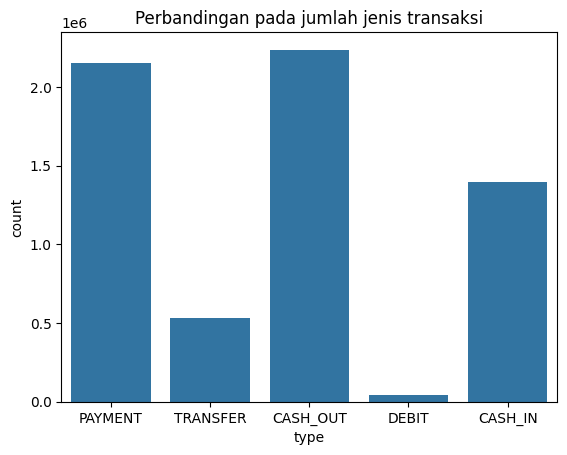

In [ ]:
# Melakuakan penjumlahan distribusi pada kolom kategori 
sns.countplot(x='type', data=transaction_dataset)
plt.title('Perbandingan pada jumlah jenis transaksi')
plt.show()

**Catatan Insight!** <br>
Pada diagram diatas menggambarkan frekuensi setiap jenis transaksi.CASH-OUT dan PAYMENT adalah yang paling umum, dengan sekitar 2 juta kejadian masing-masing.Sedangkan CASH-IN leih jarang diikuti dengan TRANSFER.Dan yang paling jarang adalah DEBIT yang menunjukan aktivitas yang cukup rendah dari jenis pembayaran yang lain.

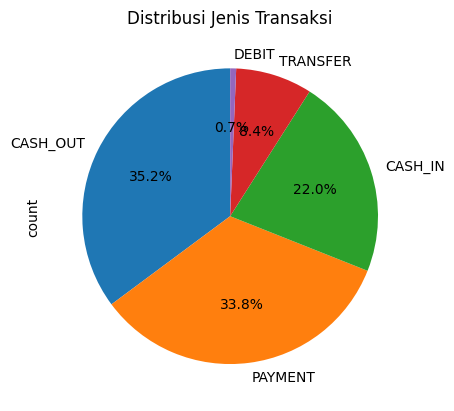

In [ ]:
transaction_dataset['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Jenis Transaksi')
plt.show()

**Catatan Insight!** <br>
Pada presentase distribusi jenis transaksi, CASH-OUT mempunya proporsi tertinggi sebesar 35.2% dan PEMBAYARAN berada di belakangnya yaitu sebesar 33.8%.Sedangkan CASH-IN mewakili 22.0%, dan TRANSFER sebesar 8.4%.DEBIT adalah bagian terkecil, hanya mencakup 0.7% transaksi saja.

**Catatan Kesimpulan!** <br>
Berdasarkan hasil analisis keduanya memberikan gambaran komprehensif mengenai distribusi transaksi, mengungkapkan keunggulan relatif dari masing-masing jenis dan membantu mengidentifikasi area potensial untuk analisis lebih lanjut, seperti mengidentifikasi tren atau menemukan anomali terkait dengan deteksi penipuan.

c:\Users\restu\OneDrive\Documents\Project\Studi Data Science\Improving Financial Security with Fraud Analysis\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


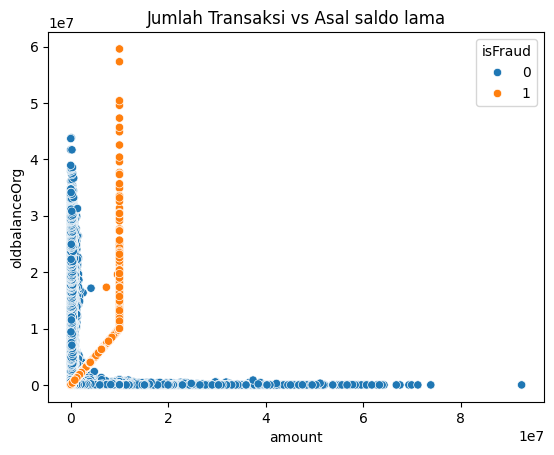

In [ ]:
sns.scatterplot(x='amount', y='oldbalanceOrg', hue='isFraud', data=transaction_dataset)
plt.title('Jumlah Transaksi vs Asal saldo lama')
plt.show()

**Catatan Insight!** <br>
Sebagian besar penyebaran titik data dikelompokkan di dekat titik asal, yang menunjukkan bahwa banyak transaksi melibatkan jumlah yang relatif kecil dan berasal dari rekening dengan saldo rendah.
Ada beberapa outlier dengan jumlah besar dan saldo awal yang tinggi, menunjukkan subset transaksi yang lebih kecil dan bernilai tinggi.Penyelarasan dilakukan pada titik-titik secara vertikal di sepanjang jumlah yang rendah dan pengelompokan horizontal di sepanjang saldo yang rendah menunjukkan distribusi yang miring, yang dapat memengaruhi analisis data atau pelatihan model yang akan dilakukan.